# **Predicting POS Handler Churn**


In This study we aim to predict Churn from the data set of POS Clients in a  Bank, we aim to accomplish the following:

* Classify if a customer is going to churn or not
* Determine the business sector of customer with high churning probability
* To determine if customers who maintain high balance are likely to churn
* To find out whether Clients benefitting from the bank services are likely to churn



**EDA (Exploratory Data Analysis)**

In [ ]:
#pip install seaborn

In [ ]:
#pip install chardet

In [1]:
## REQUIRED LIBRARIES
# For data wrangling
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
#print(os.listdir("../input"))

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns#visualization
sns.set(style="ticks", color_codes=True)
import matplotlib.ticker as mtick # For specifying the axes tick format 
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

In [2]:
#import urllib, chardet

In [3]:
#u = chardet.UniversalDetector()


In [4]:
#Import dataset into and display head of your dataset

churny = 'churn.csv'
#churn = pd.read_csv(churny)


In [5]:
import chardet
with open(churny, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

In [6]:
churn = pd.read_csv(churny, encoding='ISO-8859-1')
#churn.shape()
churn.head()

,S/N,ClientName,Address,ClientID,MerchantID,TerminalID,Tenure,BusinessType,BusinessAge,Balance,HasMB,AverageTrans,HasOtherAcc,churned
0,1,HONOUR SCHOOL ...,Ikeja,90101773301,2057LA999995707,2057QZ83,2,Enterprise,42,20000.0,1,119346.88,1,1
1,2,TORTY PAUL CHIECHEFULAM ...,Ikeja,90100906606,2057LA999995708,2057QZ84,8,Enterprise,41,50000000.0,0,73322.00,1,0
2,3,CHUDAN GLOBAL SYSTEMS NIG LTD ...,Ikeja,91000020861,2057LA999995709,2057QZ85,5,coperative,42,3000000.0,1,113677.53,0,0
3,4,ALIU ANIMASHAUN BARAKAT KIKELOMO,Ikeja,90201278489,2057LA999995710,2057QZ86,2,Individual,39,30000.0,0,124607.70,0,1
4,5,PESSU TEMISANREN,Ikeja,91300944838,2057LA999995416,2057QN36,7,Enterprise,43,50000000.0,1,11276.48,1,0


As said understanding the relation of things, people and business metrics all plays a big to understand those small obvious patterns  before the core exploratory phase,thats why  some of the attributes  have almost no impact into our results such as Client Name, Client ID,  Serial Number,... as long as we have an index(counts) it will serve as an ID.

In [7]:
#drop unnecessary attributes and display new dataset
churn = churn.drop(["S/N","ClientName", "ClientID", "MerchantID", "TerminalID" ], axis =1)


In [8]:
#Describe how big is out dataset helps to understand how big will be our analysis and requirements.
print("Rows : ",churn.shape[0])
print("Columns  : ",churn.shape[1])

Rows :  1369
Columns  :  9


In [9]:
#I check if there is any NaN values that can bring biased scenario, all column attributes should return false to verify this 
churn.isnull().any()

Address         False
Tenure          False
BusinessType    False
BusinessAge     False
Balance         False
HasMB           False
AverageTrans    False
HasOtherAcc     False
churned         False
dtype: bool

In [10]:
#count our unique values without duplication of same figure

print ("\nUnique values :  \n",churn.nunique())


Unique values :  
 Address            3
Tenure             8
BusinessType       3
BusinessAge       62
Balance           36
HasMB              2
AverageTrans    1368
HasOtherAcc        2
churned            2
dtype: int64


How huge are our attributes? in the meantime it is quite easier to spot that Address, tenure, BusinessType, Has MobileBanking, HasOtherAccount in same Bank and Churned are categorical attributes that can corresponds to (yes/no) or 1/0 to define its state. so the rest of the attributes should be continuous attributes.

In [11]:
#what are our data types
churn.dtypes

Address          object
Tenure            int64
BusinessType     object
BusinessAge       int64
Balance         float64
HasMB             int64
AverageTrans    float64
HasOtherAcc       int64
churned           int64
dtype: object

In [12]:
#Mean=> the are a lot of average calculations in statistics so i used mean the check the average possibility of attributtes to impact the situation
churn.groupby(['churned']).mean()

,Tenure,BusinessAge,Balance,HasMB,AverageTrans,HasOtherAcc
churned,,,,,,
0,5.965422,39.082988,1.908077e+07,0.723375,98489.244495,0.506224
1,2.727554,38.784830,2.902446e+06,0.707430,101764.497090,0.500000


The above Mean calculation is one of the ways to understand the average of our data, this helps us to investigate into our study whenever it has high or low measures to help to avoid biases. the difference between churned and retained are not that remarkable to give us a big picture of our study so any case can appear. But to note that:

* Customers with low Balance tend to churn,reasonable!
* on average older customers are the most to churn,questionable?
* customers with high Average Transaction are churning because probably, they are getting attracted by other banks offers which increase their wealth or with reduced bank charges
* tenure,Has Mobile Banking  and having another type of account in same bank mean are not explicitly helping in this case to hightlight anything different.

Before exploring farther into our dataset,  we can see attributes correlation with churn as we have seen that mean results are not so informative, so i first change dummies variables which are Address and BusinessType in our dataset so that we can get to define correlation of attributes to churn way easy.

In [13]:
#Let's convert all the categorical variables into dummy variables
df = pd.get_dummies(churn)
df.head()

,Tenure,BusinessAge,Balance,HasMB,AverageTrans,HasOtherAcc,churned,Address_Ajah,Address_Ikeja,Address_Lekki,BusinessType_Enterprise,BusinessType_Individual,BusinessType_coperative
0,2,42,20000.0,1,119346.88,1,1,0,1,0,1,0,0
1,8,41,50000000.0,0,73322.00,1,0,0,1,0,1,0,0
2,5,42,3000000.0,1,113677.53,0,0,0,1,0,0,0,1
3,2,39,30000.0,0,124607.70,0,1,0,1,0,0,1,0
4,7,43,50000000.0,1,11276.48,1,0,0,1,0,1,0,0


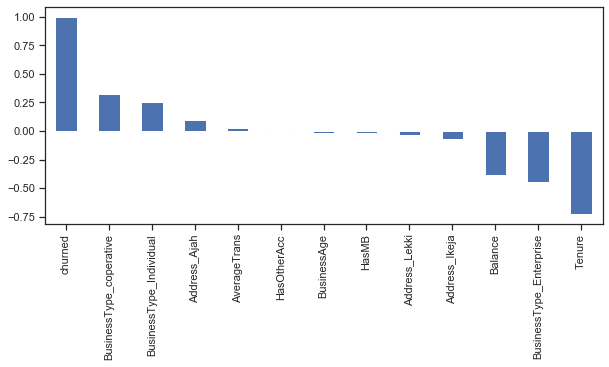

In [14]:
plt.figure(figsize=(10,4))
df.corr()['churned'].sort_values(ascending = False).plot(kind='bar')

Let's check the exact correlation with figures 

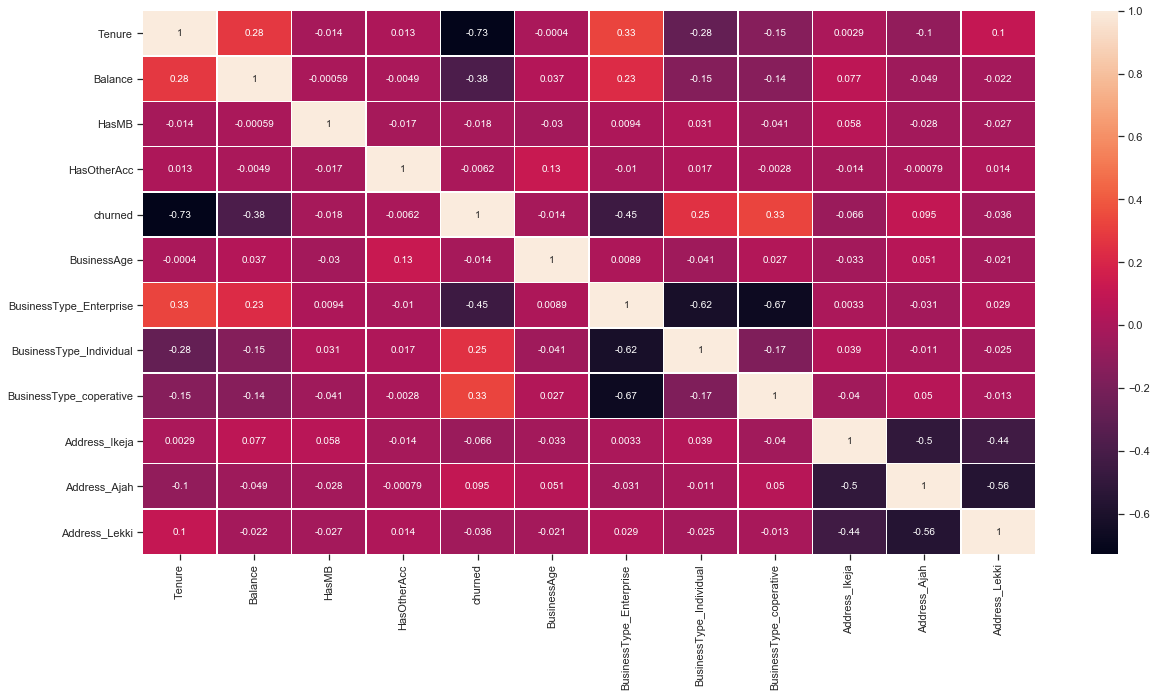

In [15]:
plt.figure(figsize = (20,10))
sns.heatmap((df.loc[:, ['Tenure','Balance','HasMB','HasOtherAcc','churned','BusinessAge','BusinessType_Enterprise','BusinessType_Individual','BusinessType_coperative','Address_Ikeja','Address_Ajah', 'Address_Lekki']]).corr(),
            annot=True,linewidths=.5);

The above heatmap easily depict how different features correlate among themselves (including against the target feature: "Churned").

Trends from the heatmap visualization:

* All features have a weak or strong correlation with the target (Thus we are considering all of them for our model)
* Tenure, BusinessType, Address, Balance are the features with significant correlation.


**Data Exploration**

This section is the core part of understanding the problem and channel it to the right features, as said before we need to establish possible relations in our attributes inorder to secure the best predictions.

Note: **Churned ** will always play the role of a target

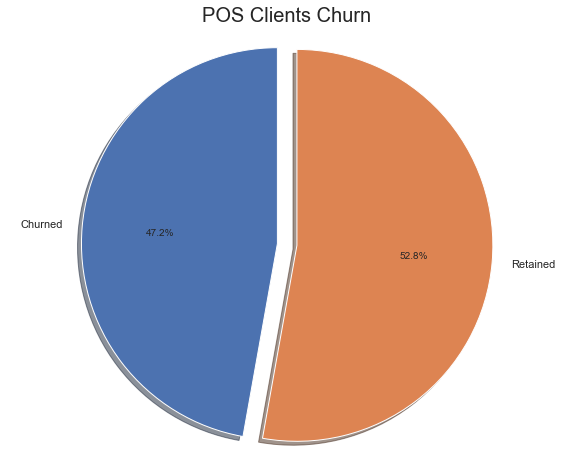

In [16]:
labels = 'Churned', 'Retained'
sizes = [df.churned[df['churned']==1].count(), df.churned[df['churned']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("POS Clients Churn", size = 20)
plt.show()

In [17]:
# Passing labels and values
lab = churn["churned"].value_counts().keys().tolist()
val = churn["churned"].value_counts().values.tolist()

trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'royalblue' ,'lime'],
                             line = dict(color = "white",
                                         width =  0.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .2
              )
layout = go.Layout(dict(title = "POS Clients Churn",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)


**47.2% Churned,
52.8% were retained**
This is a loss over a certain time yet there is no clear factor for churning maybe it is the nature of the business better be alert. but also it gives hope because the default test dataset is always 25% which will help to punish gradually.

**Head to Head attributes relations**

Categorical attributes and Continuous attributes on impacting Churned, here is not about the counts but a specifically churned and unchurned vs the service. 

Text(0, 0.5, 'count')

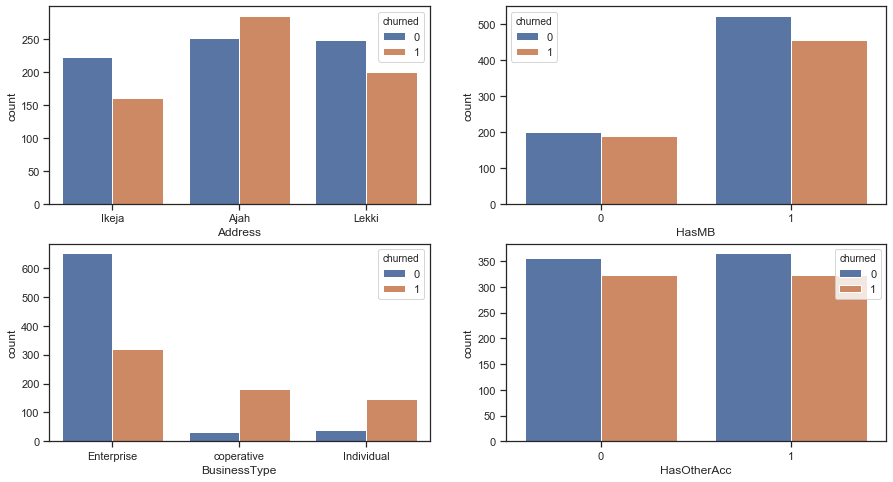

In [18]:
#Categorical attirbutes churn rate
fig, axs = plt.subplots(2, 2, figsize=(15, 8))
sns.countplot(x= churn.Address, hue = 'churned' ,data=churn, ax =axs[0][0])
sns.countplot(x=churn.BusinessType, hue = 'churned' ,data=churn, ax=axs[1][0])
sns.countplot(x=churn.HasMB, hue = 'churned' ,data=churn, ax=axs[0][1])
sns.countplot(x=churn.HasOtherAcc, hue = 'churned' ,data=churn, ax=axs[1][1])
plt.ylabel('count')



What does Categorical attributes Highlights:

* Address location can determine the success of your business and can be a great tool to know how to play with your market as Ajah show a huge number of customers with high churn, while others shows reasonable retention.

* Apparently it is possible that customers who use the mobile banking service and has other account type in the same bank have low churn level

* Enterprise businesses (large scale) have less churn than other business types; a promotional deal to consider other business types to improve retention

*  Clients who use the bank's mobile banking service churn lesser while there's no visual difference for those who have other bank account with the bank

* **Continous attributes churn rate**

For continuous attribute i will have to normalize its values in order to compare its churn it won't be possible to plot Balance and age in the same plot yet they have very different figures.

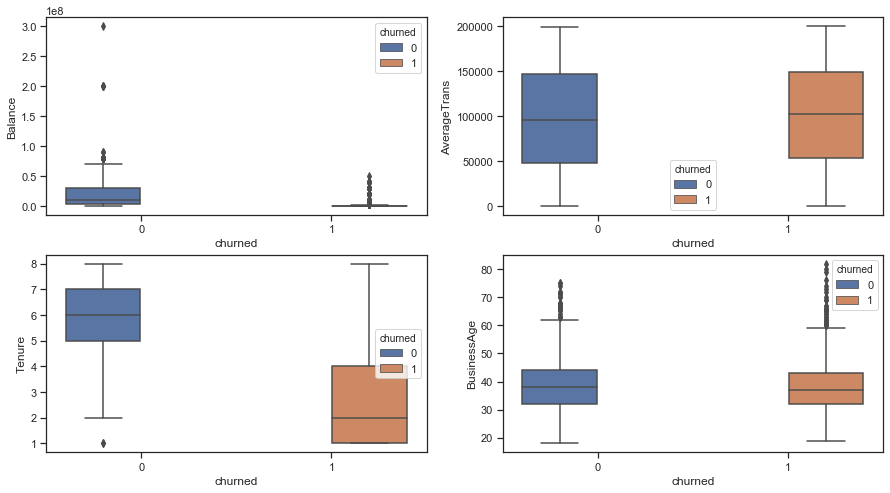

In [19]:
fig, axarr = plt.subplots(2, 2, figsize=(15, 8))
sns.boxplot(y='Balance',x = 'churned', hue = 'churned',data = churn, ax=axarr[0][0])
sns.boxplot(y='AverageTrans',x = 'churned', hue = 'churned',data = churn , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'churned', hue = 'churned',data = churn, ax=axarr[1][0])
sns.boxplot(y='BusinessAge',x = 'churned', hue = 'churned',data = churn, ax=axarr[1][1])
#sns.boxplot(y='Address',x = 'churned', hue = 'churned',data = churn, ax=axarr[2][0])
#sns.boxplot(y='BusinessType',x = 'churned', hue = 'churned',data = churn, ax=axarr[2][1])

 As seen before the mean and correlation maps outcomes relate to these continuous results. but they are more detailed in terms of churned and unchurned distribution with estimated numbers .

Over all conclusion is that all attributes have its impact to the performance for instance Balance and Average Transaction are functions of Tenure(that is the number of years your business has been using POS with the bank) the more you get older the more the relation of a customer and a bank become stronger as sign of loyalty.


**Feature Engineering and Preparation**

We are going to create new features from what we have and based on the relationship of attributes and prepare the existing ones to be ready to predict our next client possibility to churn and these stage is normally standardize head to head attributes as decided, for balance and Average Transaction this is quantitative relation then we will find its ratio

Note that df dataframe is been used because categorical attributes was converted  to dummy variables in other to achieve an excellent process.


In [20]:
df['BalanceAverageTransRatio'] = df.Balance/(df.AverageTrans)
df['TenureOverBusinessAge'] = df.Tenure/(df.BusinessAge)
df['AverageTransOverBusinessAge'] = df.AverageTrans/(df.BusinessAge)
df.head()


,Tenure,BusinessAge,Balance,HasMB,AverageTrans,HasOtherAcc,churned,Address_Ajah,Address_Ikeja,Address_Lekki,BusinessType_Enterprise,BusinessType_Individual,BusinessType_coperative,BalanceAverageTransRatio,TenureOverBusinessAge,AverageTransOverBusinessAge
0,2,42,20000.0,1,119346.88,1,1,0,1,0,1,0,0,0.167579,0.047619,2841.592381
1,8,41,50000000.0,0,73322.00,1,0,0,1,0,1,0,0,681.923570,0.195122,1788.341463
2,5,42,3000000.0,1,113677.53,0,0,0,1,0,0,0,1,26.390440,0.119048,2706.607857
3,2,39,30000.0,0,124607.70,0,1,0,1,0,0,1,0,0.240756,0.051282,3195.069231
4,7,43,50000000.0,1,11276.48,1,0,0,1,0,1,0,0,4434.007775,0.162791,262.243721


In [21]:
con_v=['AverageTrans','BusinessAge','Tenure','Balance','BalanceAverageTransRatio','TenureOverBusinessAge','AverageTransOverBusinessAge']
minVec = df[con_v].min().copy()
maxVec = df[con_v].max().copy()
df[con_v] = (df[con_v]-minVec)/(maxVec-minVec)
df.head()

,Tenure,BusinessAge,Balance,HasMB,AverageTrans,HasOtherAcc,churned,Address_Ajah,Address_Ikeja,Address_Lekki,BusinessType_Enterprise,BusinessType_Individual,BusinessType_coperative,BalanceAverageTransRatio,TenureOverBusinessAge,AverageTransOverBusinessAge
0,0.142857,0.375000,0.000000,1,0.596322,1,1,0,1,0,1,0,0,2.238996e-07,0.081305,0.325171
1,1.000000,0.359375,0.166611,0,0.365879,1,0,0,1,0,1,0,0,3.373009e-03,0.422790,0.204426
2,0.571429,0.375000,0.009934,1,0.567936,0,0,0,1,0,0,0,1,1.299537e-04,0.246670,0.309697
3,0.142857,0.328125,0.000033,0,0.622663,0,1,0,1,0,0,1,0,5.859203e-07,0.089785,0.365694
4,0.857143,0.390625,0.166611,1,0.055222,1,0,0,1,0,1,0,0,2.193533e-02,0.347940,0.029473


****Model fitting and selection****

For the model fitting, I will try out the following

* Logistic regression in the primal space and with different kernels
* SVM Support Vector Machine


Our dataset have 47.2% on churned customers this means we will try to predict. Hence we will use train_split model which deliver 25% test set and 75% traning set.because it covers the churned figure which prevent biases inside the model itself.

In [26]:
'''For the one hot variables, we change 0 to -1 so that the models can capture a negative relation 
where the attribute in inapplicable instead of 0'''
df.loc[df.HasMB == 0, 'HasMB'] = -1
df.loc[df.HasOtherAcc == 0, 'HasOtherAcc'] = -1
df.head()

,Tenure,BusinessAge,Balance,HasMB,AverageTrans,HasOtherAcc,churned,Address_Ajah,Address_Ikeja,Address_Lekki,BusinessType_Enterprise,BusinessType_Individual,BusinessType_coperative,BalanceAverageTransRatio,TenureOverBusinessAge,AverageTransOverBusinessAge
0,0.142857,0.375000,0.000000,1,0.596322,1,1,0,1,0,1,0,0,2.238996e-07,0.081305,0.325171
1,1.000000,0.359375,0.166611,-1,0.365879,1,0,0,1,0,1,0,0,3.373009e-03,0.422790,0.204426
2,0.571429,0.375000,0.009934,1,0.567936,-1,0,0,1,0,0,0,1,1.299537e-04,0.246670,0.309697
3,0.142857,0.328125,0.000033,-1,0.622663,-1,1,0,1,0,0,1,0,5.859203e-07,0.089785,0.365694
4,0.857143,0.390625,0.166611,1,0.055222,1,0,0,1,0,1,0,0,2.193533e-02,0.347940,0.029473


In [29]:
# One hot encode the categorical variables
lst = ['BusinessType_Enterprise','BusinessType_Individual','BusinessType_coperative','Address_Ajah',
      'Address_Ikeja','Address_Lekki']
remove = list()
for i in lst:
    if (df[i].dtype == np.str or df[i].dtype == np.object):
        for j in df_train[i].unique():
            df[i+'_'+j] = np.where(df[i] == j,1,-1)
        remove.append(i)
df = df.drop(remove, axis=1)
df.head()

,Tenure,BusinessAge,Balance,HasMB,AverageTrans,HasOtherAcc,churned,Address_Ajah,Address_Ikeja,Address_Lekki,BusinessType_Enterprise,BusinessType_Individual,BusinessType_coperative,BalanceAverageTransRatio,TenureOverBusinessAge,AverageTransOverBusinessAge
0,0.142857,0.375000,0.000000,1,0.596322,1,1,0,1,0,1,0,0,2.238996e-07,0.081305,0.325171
1,1.000000,0.359375,0.166611,-1,0.365879,1,0,0,1,0,1,0,0,3.373009e-03,0.422790,0.204426
2,0.571429,0.375000,0.009934,1,0.567936,-1,0,0,1,0,0,0,1,1.299537e-04,0.246670,0.309697
3,0.142857,0.328125,0.000033,-1,0.622663,-1,1,0,1,0,0,1,0,5.859203e-07,0.089785,0.365694
4,0.857143,0.390625,0.166611,1,0.055222,1,0,0,1,0,1,0,0,2.193533e-02,0.347940,0.029473


In [30]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
y = df['churned'].values
x = df.drop(columns = ['churned'])
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state=0)

In [31]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [32]:
# Support functions
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

# Fit models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
#from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Scoring functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


**Logistic Regression**

In [35]:
# Function to give best model score and parameters
def best_model(model):
    print(model.best_score_)    
    print(model.best_params_)
    print(model.best_estimator_)
def get_auc_scores(y_actual, method,method2):
    auc_score = roc_auc_score(y_actual, method); 
    fpr_df, tpr_df, _ = roc_curve(y_actual, method2); 
    return (auc_score, fpr_df, tpr_df)

In [38]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model = LogisticRegression()
result = model.fit(x_train, y_train)
prediction_test = model.predict(x_test)
print (metrics.accuracy_score(y_test, prediction_test))# Print the prediction accuracy

0.8979591836734694


BusinessType_coperative        1.549651
AverageTransOverBusinessAge    0.471943
Address_Lekki                  0.312080
Address_Ajah                   0.169825
HasMB                         -0.052343
HasOtherAcc                   -0.059627
BusinessType_Individual       -0.311846
BalanceAverageTransRatio      -0.382768
Address_Ikeja                 -0.479366
BusinessAge                   -0.495404
AverageTrans                  -0.683825
BusinessType_Enterprise       -1.235265
TenureOverBusinessAge         -1.950300
Balance                       -3.804646
Tenure                        -6.098221
dtype: float64

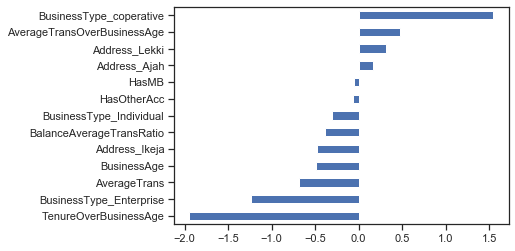

In [40]:
# getting the weights of all the variables on regression model
weights = pd.Series(model.coef_[0],
                 index=x.columns.values)
weights.sort_values()[-13:].plot(kind = 'barh')
weights.sort_values(ascending = False)


In [39]:
# Fit primal logistic regression
param_grid = {'C': [0.1,0.5,1,10,50,100], 'max_iter': [250], 'fit_intercept':[True],'intercept_scaling':[1],
              'penalty':['l2'], 'tol':[0.00001,0.0001,0.000001]}
log_primal_Grid = GridSearchCV(LogisticRegression(solver='lbfgs'),param_grid, cv=10, refit=True, verbose=0)
log_primal_Grid.fit(df.loc[:, df.columns != 'churned'],df.churned)
best_model(log_primal_Grid)

0.869310863031344
{'C': 0.1, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 250, 'penalty': 'l2', 'tol': 1e-05}
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=250,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=1e-05, verbose=0,
                   warm_start=False)


In [41]:
# Fit logistic regression with degree 2 polynomial kernel
param_grid = {'C': [0.1,10,50], 'max_iter': [300,500], 'fit_intercept':[True],'intercept_scaling':[1],'penalty':['l2'],
              'tol':[0.0001,0.000001]}
poly2 = PolynomialFeatures(degree=2)
df_train_pol2 = poly2.fit_transform(df.loc[:, df.columns != 'churned'])
log_pol2_Grid = GridSearchCV(LogisticRegression(solver = 'liblinear'),param_grid, cv=5, refit=True, verbose=0)
log_pol2_Grid.fit(df_train_pol2,df.churned)
best_model(log_pol2_Grid)

0.8583700970562285
{'C': 0.1, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 300, 'penalty': 'l2', 'tol': 0.0001}
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


**Support Vecor Machine (SVM)**

In [42]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
model.svm = SVC(kernel='linear') 
model.svm.fit(x_train,y_train)
preds = model.svm.predict(x_test)
metrics.accuracy_score(y_test, preds)# Print the prediction accuracy

0.9183673469387755

In [43]:
from sklearn.neighbors import KNeighborsClassifier
classifiers = [
    KNeighborsClassifier(5),    
]
# iterate over classifiers
for item in classifiers:
    classifier_name = ((str(item)[:(str(item).find("("))]))
    print (classifier_name)
    # Create classifier, train it and test it.
    clf = item
    clf.fit(x_train, y_train)
    pred = clf.predict(x_test)
    score = clf.score(x_test, y_test)
    print (round(score,3),"\n", "- - - - - ", "\n") # Print the prediction accuracy
    


KNeighborsClassifier
0.91 
 - - - - -  



In [44]:
# Fit SVM with RBF Kernel
param_grid = {'C': [0.5,100,150], 'gamma': [0.1,0.01,0.001],'probability':[True],'kernel': ['rbf']}
SVM_grid = GridSearchCV(SVC(), param_grid, cv=3, refit=True, verbose=0)
SVM_grid.fit(df.loc[:, df.columns != 'churned'],df.churned)
best_model(SVM_grid)

0.8554647011401589
{'C': 150, 'gamma': 0.01, 'kernel': 'rbf', 'probability': True}
SVC(C=150, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [45]:
# Fit SVM with pol kernel
param_grid = {'C': [0.5,1,10,50,100], 'gamma': [0.1,0.01,0.001],'probability':[True],'kernel': ['poly'],'degree':[2,3] }
SVM_grid = GridSearchCV(SVC(), param_grid, cv=3, refit=True, verbose=0)
SVM_grid.fit(df.loc[:, df.columns != 'churned'],df.churned)
best_model(SVM_grid)

0.868622595877001
{'C': 0.5, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly', 'probability': True}
SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma=0.1, kernel='poly',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


**Fit best Models**

In [47]:
# Fit primal logistic regression
log_primal = LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=250, multi_class='auto',n_jobs=None, 
                                penalty='l2', random_state=None, solver='lbfgs',tol=1e-05, verbose=0, warm_start=False)
log_primal.fit(df.loc[:, df.columns != 'churned'],df.churned)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=250,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=1e-05, verbose=0,
                   warm_start=False)

In [50]:
# Fit logistic regression with pol 2 kernel
poly2 = PolynomialFeatures(degree=2)
df_train_pol2 = poly2.fit_transform(df.loc[:, df.columns != 'churned'])
log_pol2 = LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=300, multi_class='auto', n_jobs=None, 
                              penalty='l2', random_state=None, solver='liblinear',tol=0.0001, verbose=0, warm_start=False)
log_pol2.fit(df_train_pol2,df.churned)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
# Fit SVM with RBF Kernel
SVM_RBF = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf', max_iter=-1, probability=True, 
              random_state=None, shrinking=True,tol=0.001, verbose=False)
SVM_RBF.fit(df.loc[:, df.columns != 'churned'],df.churned)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [53]:
# Fit SVM with Pol Kernel
SVM_POL = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,  decision_function_shape='ovr', degree=2, gamma=0.1, kernel='poly',  max_iter=-1,
              probability=True, random_state=None, shrinking=True, tol=0.001, verbose=False)
SVM_POL.fit(df.loc[:, df.columns != 'churned'],df.churned)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma=0.1, kernel='poly',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

**Review best model fit accuracy : Keen interest is on the performance in predicting 1's (Clients who churn)**

**Logistics Regression Predict**

In [55]:
print(classification_report(df.churned, log_primal.predict(df.loc[:, df.columns != 'churned'])))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       723
           1       0.88      0.85      0.86       646

    accuracy                           0.87      1369
   macro avg       0.87      0.87      0.87      1369
weighted avg       0.87      0.87      0.87      1369



In [56]:
print(classification_report(df.churned,  log_pol2.predict(df_train_pol2)))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       723
           1       0.91      0.87      0.89       646

    accuracy                           0.90      1369
   macro avg       0.90      0.90      0.90      1369
weighted avg       0.90      0.90      0.90      1369



**SVM Predict**

In [57]:
print(classification_report(df.churned,  SVM_RBF.predict(df.loc[:, df.columns != 'churned'])))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       723
           1       0.93      0.88      0.90       646

    accuracy                           0.91      1369
   macro avg       0.91      0.91      0.91      1369
weighted avg       0.91      0.91      0.91      1369



In [59]:
print(classification_report(df.churned,  SVM_POL.predict(df.loc[:, df.columns != 'churned'])))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       723
           1       0.91      0.87      0.89       646

    accuracy                           0.90      1369
   macro avg       0.90      0.90      0.90      1369
weighted avg       0.90      0.90      0.90      1369



In [62]:
y = df.churned
X = df.loc[:, df.columns != 'churned']
X_pol2 = df_train_pol2
auc_log_primal, fpr_log_primal, tpr_log_primal = get_auc_scores(y, log_primal.predict(X),log_primal.predict_proba(X)[:,1])
auc_log_pol2, fpr_log_pol2, tpr_log_pol2 = get_auc_scores(y, log_pol2.predict(X_pol2),log_pol2.predict_proba(X_pol2)[:,1])
auc_SVM_RBF, fpr_SVM_RBF, tpr_SVM_RBF = get_auc_scores(y, SVM_RBF.predict(X),SVM_RBF.predict_proba(X)[:,1])
auc_SVM_POL, fpr_SVM_POL, tpr_SVM_POL = get_auc_scores(y, SVM_POL.predict(X),SVM_POL.predict_proba(X)[:,1])
#auc_RF, fpr_RF, tpr_RF = get_auc_scores(y, RF.predict(X),RF.predict_proba(X)[:,1])
#auc_XGB, fpr_XGB, tpr_XGB = get_auc_scores(y, XGB.predict(X),XGB.predict_proba(X)[:,1])

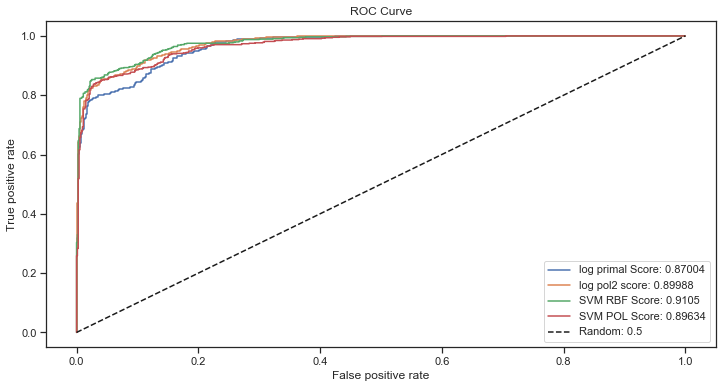

In [63]:
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_log_primal, tpr_log_primal, label = 'log primal Score: ' + str(round(auc_log_primal, 5)))
plt.plot(fpr_log_pol2, tpr_log_pol2, label = 'log pol2 score: ' + str(round(auc_log_pol2, 5)))
plt.plot(fpr_SVM_RBF, tpr_SVM_RBF, label = 'SVM RBF Score: ' + str(round(auc_SVM_RBF, 5)))
plt.plot(fpr_SVM_POL, tpr_SVM_POL, label = 'SVM POL Score: ' + str(round(auc_SVM_POL, 5)))
#plt.plot(fpr_RF, tpr_RF, label = 'RF score: ' + str(round(auc_RF, 5)))
#plt.plot(fpr_XGB, tpr_XGB, label = 'XGB score: ' + str(round(auc_XGB, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()

From the above results, our aim is to predict the customers that will possibly churn so they can be put in some sort of scheme to prevent churn hence the recall measures on the 1's is of more importance to me than the overall accuracy score of the model.

Given that in the data we only had 47% of churn, a recall greater than this baseline will already be an improvement but we want to get as high as possible while trying to maintain a high precision so that the bank can train its resources effectively towards clients highlighted by the model without wasting too much resources on the false positives.

From the review of the fitted models above, the best model that gives a decent balance of the recall and precision is the Support Vector Machine where according to the fit on the training set, with a precision score on 1's of 0.91, out of all customers that the model thinks will churn, 91% do actually churn and with the recall score of 0.92 on the 1's, the model is able to highlight 92% of all those who churned.

**Thank You.**